[[  4.868884     3.95858698   3.82893522]
 [  3.29855704   9.66881151  10.04270063]
 [  1.53806226   1.49444106   1.5502625 ]]
Number of estimated clusters: 3


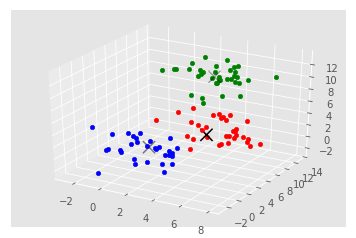

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel("/home/celebal/Downloads/titanic.xls")

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
    
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

/home/celebal/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/celebal/.local/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.350207468879668, 1: 0.6363636363636364, 2: 1.0, 3: 0.1, 4: 0.9782608695652174}


In [5]:
print(original_df[ (original_df['cluster_group']==0)].describe())

            pclass     survived         age        sibsp        parch  \
count  1205.000000  1205.000000  945.000000  1205.000000  1205.000000   
mean      2.381743     0.350207   29.029894     0.488797     0.309544   
std       0.790516     0.477233   14.057163     1.063241     0.664439   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   27.000000     0.000000     0.000000   
75%       3.000000     1.000000   36.500000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     8.000000     4.000000   

              fare        body  cluster_group  
count  1204.000000  112.000000         1205.0  
mean     23.435170  161.517857            0.0  
std      25.945085   99.150262            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   69.750000            0.0  
50%      13.000000  165.500000            0.0  
75%   